<a href="https://colab.research.google.com/github/AkshayK25/MOVIE-LENS-ANALYSIS/blob/master/MOVIE_LENS_ANALYSIS_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [0]:
# Import the numpy and pandas packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import matplotlib.animation as animation
from sklearn import linear_model

## Task 1: Reading and Inspection

-  ### Subtask 1.1: Import and read

Import and read the movie database. Store it in a variable called `movies`.

In [0]:
movies = pd.read_csv("https://raw.githubusercontent.com/AkshayK25/GoOgle-ColAbOratories/master/Movie%2BAssignment%2BData.csv")
# Write your code for importing the csv file here
movies

color       director_name  ...  aspect_ratio  movie_facebook_likes
0                Color       James Cameron  ...          1.78                 33000
1                Color      Gore Verbinski  ...          2.35                     0
2                Color          Sam Mendes  ...          2.35                 85000
3                Color   Christopher Nolan  ...          2.35                164000
4                  NaN         Doug Walker  ...           NaN                     0
5                Color      Andrew Stanton  ...          2.35                 24000
6                Color           Sam Raimi  ...          2.35                     0
7                Color        Nathan Greno  ...          1.85                 29000
8                Color         Joss Whedon  ...          2.35                118000
9                Color         David Yates  ...          2.35                 10000
10               Color         Zack Snyder  ...          2.35                197000
11               Color        Bryan Singer  ...          2.35                     0
12               Color        Marc Forster  ...          2.35                     0
13               Color      Gore Verbinski  ...          2.35                  5000
14               Color      Gore Verbinski  ...          2.35                 48000
15               Color         Zack Snyder  ...          2.35                118000
16               Color      Andrew Adamson  ...          2.35                     0
17               Color         Joss Whedon  ...          1.85                123000
18               Color        Rob Marshall  ...          2.35                 58000
19               Color    Barry Sonnenfeld  ...          1.85                 40000
20               Color       Peter Jackson  ...          2.35                 65000
21               Color           Marc Webb  ...          2.35                 56000
22               Color        Ridley Scott  ...          2.35                 17000
23               Color       Peter Jackson  ...          2.35                 83000
24               Color         Chris Weitz  ...          2.35                     0
25               Color       Peter Jackson  ...          2.35                     0
26               Color       James Cameron  ...          2.35                 26000
27               Color       Anthony Russo  ...          2.35                 72000
28               Color          Peter Berg  ...          2.35                 44000
29               Color     Colin Trevorrow  ...          2.00                150000
...                ...                 ...  ...           ...                   ...
5013             Color          Eric Eason  ...          1.78                    61
5014             Color            Uwe Boll  ...          2.35                     0
5015   Black and White   Richard Linklater  ...          1.37                  2000
5016             Color     Joseph Mazzella  ...           NaN                    33
5017             Color        Travis Legge  ...          1.78                   200
5018             Color       Alex Kendrick  ...          1.85                   725
5019             Color       Marcus Nispel  ...          1.85                     0
5020               NaN     Brandon Landers  ...           NaN                    33
5021             Color         Jay Duplass  ...           NaN                   297
5022   Black and White          Jim Chuchu  ...           NaN                    45
5023             Color          Daryl Wein  ...          2.35                   324
5024             Color         Jason Trost  ...          2.35                   835
5025             Color         John Waters  ...          1.37                     0
5026             Color     Olivier Assayas  ...          2.35                   171
5027             Color        Jafar Panahi  ...          1.85                   697
5028   Black and White       Ivan Kavanagh  ...          1.33        

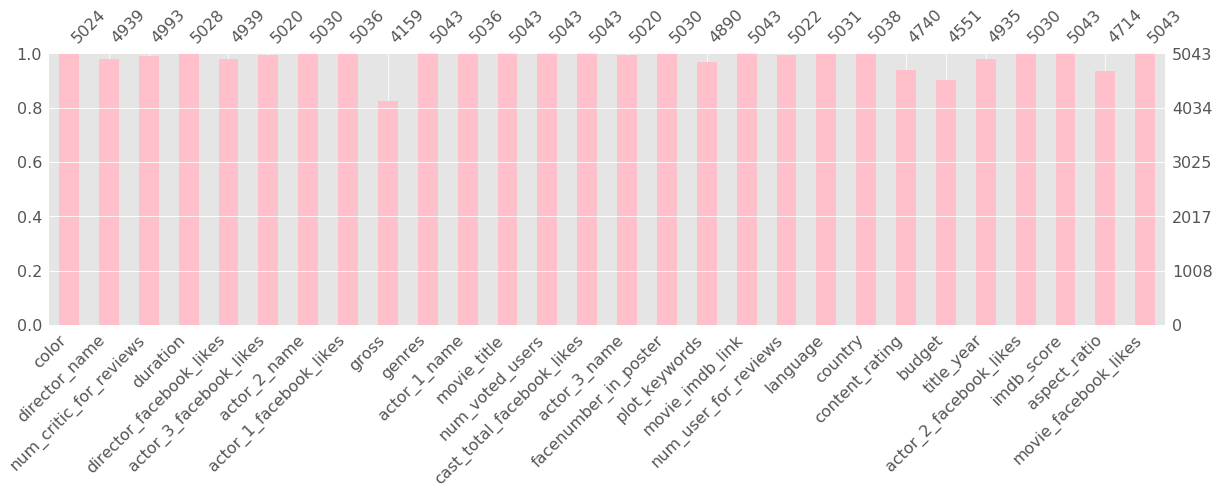

In [0]:
import missingno as msno
msno.bar(movies,figsize=(20,5),color='pink')

-  ### Subtask 1.2: Inspect the dataframe

Inspect the dataframe's columns, shapes, variable types etc.

In [0]:
# Write your code for inspection here
movies.describe()


num_critic_for_reviews     duration  ...  aspect_ratio  movie_facebook_likes
count             4993.000000  5028.000000  ...   4714.000000           5043.000000
mean               140.194272   107.201074  ...      2.220403           7525.964505
std                121.601675    25.197441  ...      1.385113          19320.445110
min                  1.000000     7.000000  ...      1.180000              0.000000
25%                 50.000000    93.000000  ...      1.850000              0.000000
50%                110.000000   103.000000  ...      2.350000            166.000000
75%                195.000000   118.000000  ...      2.350000           3000.000000
max                813.000000   511.000000  ...     16.000000         349000.000000

[8 rows x 16 columns]

In [0]:
movies.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [0]:
movies.shape

(5043, 28)

In [0]:
movies.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [0]:
length_initial_Rows = len(movies.index)
length_initial_Rows

5043

## Task 2: Cleaning the Data

-  ### Subtask 2.1: Inspect Null values

Find out the number of Null values in all the columns and rows. Also, find the percentage of Null values in each column. Round off the percentages upto two decimal places.

In [0]:
# Write your code for column-wise null count here
movies.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [0]:
# Write your code for row-wise null count here
movies.isnull().sum(axis = 1)

0        0
1        0
2        0
3        0
4       14
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
5013     2
5014     2
5015     0
5016     5
5017     2
5018     2
5019     2
5020     5
5021     1
5022     4
5023     2
5024     1
5025     0
5026     0
5027     0
5028     3
5029     1
5030     5
5031     3
5032     4
5033     0
5034     1
5035     0
5036     3
5037     1
5038     4
5039     5
5040     4
5041     2
5042     0
Length: 5043, dtype: int64

In [0]:
# Write your code for column-wise null percentages here
col_percent_null_values =(movies.isnull().sum()/len(movies))*100
round(col_percent_null_values,2)

color                         0.38
director_name                 2.06
num_critic_for_reviews        0.99
duration                      0.30
director_facebook_likes       2.06
actor_3_facebook_likes        0.46
actor_2_name                  0.26
actor_1_facebook_likes        0.14
gross                        17.53
genres                        0.00
actor_1_name                  0.14
movie_title                   0.00
num_voted_users               0.00
cast_total_facebook_likes     0.00
actor_3_name                  0.46
facenumber_in_poster          0.26
plot_keywords                 3.03
movie_imdb_link               0.00
num_user_for_reviews          0.42
language                      0.24
country                       0.10
content_rating                6.01
budget                        9.76
title_year                    2.14
actor_2_facebook_likes        0.26
imdb_score                    0.00
aspect_ratio                  6.52
movie_facebook_likes          0.00
dtype: float64

-  ### Subtask 2.2: Drop unecessary columns

For this assignment, you will mostly be analyzing the movies with respect to the ratings, gross collection, popularity of movies, etc. So many of the columns in this dataframe are not required. So it is advised to drop the following columns.
-  color
-  director_facebook_likes
-  actor_1_facebook_likes
-  actor_2_facebook_likes
-  actor_3_facebook_likes
-  actor_2_name
-  cast_total_facebook_likes
-  actor_3_name
-  duration
-  facenumber_in_poster
-  content_rating
-  country
-  movie_imdb_link
-  aspect_ratio
-  plot_keywords

In [0]:
# Write your code for dropping the columns here. It is advised to keep inspecting the dataframe after each set of operations 
movies.drop(['color','plot_keywords','director_facebook_likes','actor_1_facebook_likes',
             'actor_2_facebook_likes','actor_3_facebook_likes','actor_2_name','cast_total_facebook_likes',
             'actor_3_name','duration','facenumber_in_poster','content_rating','country','movie_imdb_link',
             'aspect_ratio'],axis = 1,inplace = True)
movies.head(10)

director_name  num_critic_for_reviews  ...  imdb_score movie_facebook_likes
0      James Cameron                   723.0  ...         7.9                33000
1     Gore Verbinski                   302.0  ...         7.1                    0
2         Sam Mendes                   602.0  ...         6.8                85000
3  Christopher Nolan                   813.0  ...         8.5               164000
4        Doug Walker                     NaN  ...         7.1                    0
5     Andrew Stanton                   462.0  ...         6.6                24000
6          Sam Raimi                   392.0  ...         6.2                    0
7       Nathan Greno                   324.0  ...         7.8                29000
8        Joss Whedon                   635.0  ...         7.5               118000
9        David Yates                   375.0  ...         7.5                10000

[10 rows x 13 columns]

-  ### Subtask 2.3: Drop unecessary rows using columns with high Null percentages

Now, on inspection you might notice that some columns have large percentage (greater than 5%) of Null values. Drop all the rows which have Null values for such columns.

In [0]:
# Write your code for dropping the rows here
movies= movies.loc[100*(movies.isnull().sum(axis = 1)/len(movies.columns))<= 5]
movies.head(10)

director_name  num_critic_for_reviews  ...  imdb_score movie_facebook_likes
0       James Cameron                   723.0  ...         7.9                33000
1      Gore Verbinski                   302.0  ...         7.1                    0
2          Sam Mendes                   602.0  ...         6.8                85000
3   Christopher Nolan                   813.0  ...         8.5               164000
5      Andrew Stanton                   462.0  ...         6.6                24000
6           Sam Raimi                   392.0  ...         6.2                    0
7        Nathan Greno                   324.0  ...         7.8                29000
8         Joss Whedon                   635.0  ...         7.5               118000
9         David Yates                   375.0  ...         7.5                10000
10        Zack Snyder                   673.0  ...         6.9               197000

[10 rows x 13 columns]

-  ### Subtask 2.4: Drop unecessary rows

Some of the rows might have greater than five NaN values. Such rows aren't of much use for the analysis and hence, should be removed.

In [0]:
# Write your code for dropping the rows here
movies.dropna(thresh = 5)

movies

director_name  ...  movie_facebook_likes
0          James Cameron  ...                 33000
1         Gore Verbinski  ...                     0
2             Sam Mendes  ...                 85000
3      Christopher Nolan  ...                164000
5         Andrew Stanton  ...                 24000
6              Sam Raimi  ...                     0
7           Nathan Greno  ...                 29000
8            Joss Whedon  ...                118000
9            David Yates  ...                 10000
10           Zack Snyder  ...                197000
11          Bryan Singer  ...                     0
12          Marc Forster  ...                     0
13        Gore Verbinski  ...                  5000
14        Gore Verbinski  ...                 48000
15           Zack Snyder  ...                118000
16        Andrew Adamson  ...                     0
17           Joss Whedon  ...                123000
18          Rob Marshall  ...                 58000
19      Barry Sonnenfeld  ...                 40000
20         Peter Jackson  ...                 65000
21             Marc Webb  ...                 56000
22          Ridley Scott  ...                 17000
23         Peter Jackson  ...                 83000
24           Chris Weitz  ...                     0
25         Peter Jackson  ...                     0
26         James Cameron  ...                 26000
27         Anthony Russo  ...                 72000
28            Peter Berg  ...                 44000
29       Colin Trevorrow  ...                150000
30            Sam Mendes  ...                 80000
...                  ...  ...                   ...
4959     Robert Townsend  ...                   471
4962       Larry Blamire  ...                     0
4964           E.L. Katz  ...                     0
4971      Dennis Iliadis  ...                     0
4973    Darren Aronofsky  ...                 24000
4975     Myles Berkowitz  ...                    30
4977     Morgan Spurlock  ...                     0
4978       Brandon Trost  ...                     0
4979        Joe Swanberg  ...                   812
4984        Edward Burns  ...                   265
4987         Lena Dunham  ...                     0
4997  David Gordon Green  ...                   451
4998        Kevin Jordan  ...                     0
5004          Mike Bruce  ...                    13
5008         Kevin Smith  ...                     0
5009       James Bidgood  ...                    85
5011         Neil LaBute  ...                   489
5012          David Ayer  ...                 10000
5015   Richard Linklater  ...                  2000
5021         Jay Duplass  ...                   297
5023          Daryl Wein  ...                   324
5025         John Waters  ...                     0
5026     Olivier Assayas  ...                   171
5027        Jafar Panahi  ...                   697
5029    Kiyoshi Kurosawa  ...                   817
5033       Shane Carruth  ...                 19000
5034    Neill Dela Llana  ...                    74
5035    Robert Rodriguez  ...                     0
5037        Edward Burns  ...                   413
5042            Jon Gunn  ...                   456

[3884 rows x 13 columns]

-  ### Subtask 2.5: Fill NaN values

You might notice that the `language` column has some NaN values. Here, on inspection, you will see that it is safe to replace all the missing values with `'English'`.

In [0]:
# Write your code for filling the NaN values in the 'language' column here
movies['language'] = movies['language'].replace(np.nan, 'English')
movies.shape

(3884, 13)

-  ### Subtask 2.6: Check the number of retained rows

You might notice that two of the columns viz. `num_critic_for_reviews` and `actor_1_name` have small percentages of NaN values left. You can let these columns as it is for now. Check the number and percentage of the rows retained after completing all the tasks above.

In [0]:
# Write your code for checking number of retained rows here
length_final_Rows=len(movies.index)
retained_percentage_Rows= (length_final_Rows/length_initial_Rows)*100
print(round(retained_percentage_Rows,2))


77.02


**Checkpoint 1:** You might have noticed that we still have around `77%` of the rows!

## Task 3: Data Analysis

-  ### Subtask 3.1: Change the unit of columns

Convert the unit of the `budget` and `gross` columns from `$` to `million $`.

In [0]:
# Write your code for unit conversion here
movies['gross']=(movies['gross'].astype(float)/1000000).round(2)
movies['budget']=(movies['budget'].astype(float)/1000000).round(2)
movies

director_name  ...  movie_facebook_likes
0          James Cameron  ...                 33000
1         Gore Verbinski  ...                     0
2             Sam Mendes  ...                 85000
3      Christopher Nolan  ...                164000
5         Andrew Stanton  ...                 24000
6              Sam Raimi  ...                     0
7           Nathan Greno  ...                 29000
8            Joss Whedon  ...                118000
9            David Yates  ...                 10000
10           Zack Snyder  ...                197000
11          Bryan Singer  ...                     0
12          Marc Forster  ...                     0
13        Gore Verbinski  ...                  5000
14        Gore Verbinski  ...                 48000
15           Zack Snyder  ...                118000
16        Andrew Adamson  ...                     0
17           Joss Whedon  ...                123000
18          Rob Marshall  ...                 58000
19      Barry Sonnenfeld  ...                 40000
20         Peter Jackson  ...                 65000
21             Marc Webb  ...                 56000
22          Ridley Scott  ...                 17000
23         Peter Jackson  ...                 83000
24           Chris Weitz  ...                     0
25         Peter Jackson  ...                     0
26         James Cameron  ...                 26000
27         Anthony Russo  ...                 72000
28            Peter Berg  ...                 44000
29       Colin Trevorrow  ...                150000
30            Sam Mendes  ...                 80000
...                  ...  ...                   ...
4959     Robert Townsend  ...                   471
4962       Larry Blamire  ...                     0
4964           E.L. Katz  ...                     0
4971      Dennis Iliadis  ...                     0
4973    Darren Aronofsky  ...                 24000
4975     Myles Berkowitz  ...                    30
4977     Morgan Spurlock  ...                     0
4978       Brandon Trost  ...                     0
4979        Joe Swanberg  ...                   812
4984        Edward Burns  ...                   265
4987         Lena Dunham  ...                     0
4997  David Gordon Green  ...                   451
4998        Kevin Jordan  ...                     0
5004          Mike Bruce  ...                    13
5008         Kevin Smith  ...                     0
5009       James Bidgood  ...                    85
5011         Neil LaBute  ...                   489
5012          David Ayer  ...                 10000
5015   Richard Linklater  ...                  2000
5021         Jay Duplass  ...                   297
5023          Daryl Wein  ...                   324
5025         John Waters  ...                     0
5026     Olivier Assayas  ...                   171
5027        Jafar Panahi  ...                   697
5029    Kiyoshi Kurosawa  ...                   817
5033       Shane Carruth  ...                 19000
5034    Neill Dela Llana  ...                    74
5035    Robert Rodriguez  ...                     0
5037        Edward Burns  ...                   413
5042            Jon Gunn  ...                   456

[3884 rows x 13 columns]

In [0]:
kf = movies[(movies.gross < 200) & (movies.gross > 10) & (movies.budget < 100)]

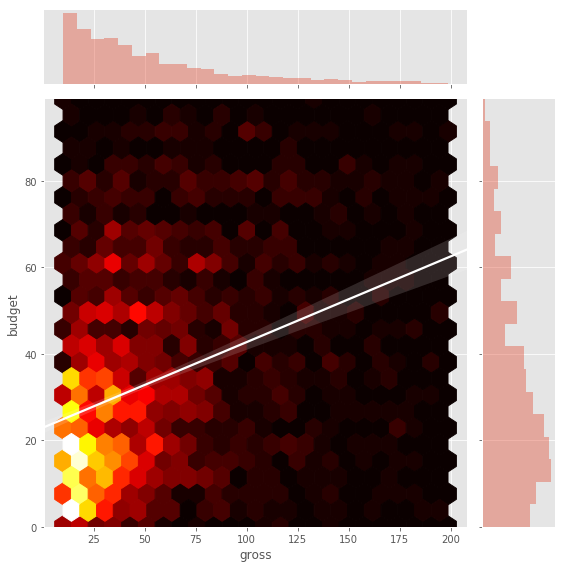

In [0]:
g = sns.jointplot(x = 'gross',
                  y = 'budget',
              data = kf, 
              kind = 'hex', 
              cmap= 'hot', 
              size=8)


sns.regplot(kf.gross,kf.budget, ax=g.ax_joint, scatter=False, color='white');

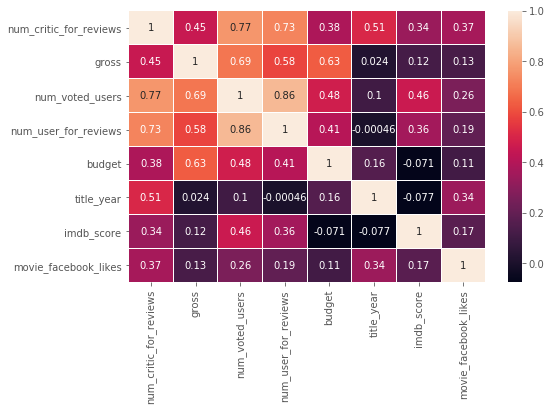

In [0]:
graph = movies.corr(method='spearman')
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(graph, ax=ax, linewidths=0.1,annot=True)

-  ### Subtask 3.2: Find the movies with highest profit

    1. Create a new column called `profit` which contains the difference of the two columns: `gross` and `budget`.
    2. Sort the dataframe using the `profit` column as reference.
    3. Extract the top ten profiting movies in descending order and store them in a new dataframe - `top10`

In [0]:
# Write your code for creating the profit column here
movies['Profit']=movies['gross']-movies['budget']
movies

director_name  num_critic_for_reviews  ...  movie_facebook_likes  Profit
0          James Cameron                   723.0  ...                 33000  523.51
1         Gore Verbinski                   302.0  ...                     0    9.40
2             Sam Mendes                   602.0  ...                 85000  -44.93
3      Christopher Nolan                   813.0  ...                164000  198.13
5         Andrew Stanton                   462.0  ...                 24000 -190.64
6              Sam Raimi                   392.0  ...                     0   78.53
7           Nathan Greno                   324.0  ...                 29000  -59.19
8            Joss Whedon                   635.0  ...                118000  208.99
9            David Yates                   375.0  ...                 10000   51.96
10           Zack Snyder                   673.0  ...                197000   80.25
11          Bryan Singer                   434.0  ...                     0   -8.93
12          Marc Forster                   403.0  ...                     0  -31.63
13        Gore Verbinski                   313.0  ...                  5000  198.03
14        Gore Verbinski                   450.0  ...                 48000 -125.71
15           Zack Snyder                   733.0  ...                118000   66.02
16        Andrew Adamson                   258.0  ...                     0  -83.39
17           Joss Whedon                   703.0  ...                123000  403.28
18          Rob Marshall                   448.0  ...                 58000   -8.94
19      Barry Sonnenfeld                   451.0  ...                 40000  -45.98
20         Peter Jackson                   422.0  ...                 65000    5.11
21             Marc Webb                   599.0  ...                 56000   32.03
22          Ridley Scott                   343.0  ...                 17000  -94.78
23         Peter Jackson                   509.0  ...                 83000   33.36
24           Chris Weitz                   251.0  ...                     0 -109.92
25         Peter Jackson                   446.0  ...                     0   11.05
26         James Cameron                   315.0  ...                 26000  458.67
27         Anthony Russo                   516.0  ...                 72000  157.20
28            Peter Berg                   377.0  ...                 44000 -143.83
29       Colin Trevorrow                   644.0  ...                150000  502.18
30            Sam Mendes                   750.0  ...                 80000  104.36
...                  ...                     ...  ...                   ...     ...
4959     Robert Townsend                    21.0  ...                   471    5.13
4962       Larry Blamire                    88.0  ...                     0    0.07
4964           E.L. Katz                   193.0  ...                     0   -0.14
4971      Dennis Iliadis                   241.0  ...                     0   17.72
4973    Darren Aronofsky                   138.0  ...                 24000    3.16
4975     Myles Berkowitz                    32.0  ...                    30    0.48
4977     Morgan Spurlock                   193.0  ...                     0   11.47
4978       Brandon Trost                    66.0  ...                     0   -0.02
4979        Joe Swanberg                    65.0  ...                   812   -0.04
4984        Edward Burns                    36.0  ...                   265   10.23
4987         Lena Dunham                   113.0  ...                     0    0.33
4997  David Gordon Green                    75.0  ...                   451    0.20
4998        Kevin Jordan                    21.0  ...                     0    0.24
5004          Mike Bruce                     3.0  ...                    13    0.21
5008         Kevin Smith                   136.0  ...                     0    2.92
5009       James Bidgood                     8.0  ...          

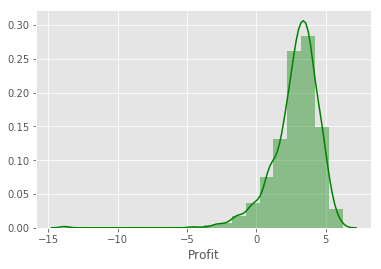

In [0]:
sns.distplot(np.log(movies['Profit'].dropna()+0.000001),kde=True,color='g',bins=20)

In [0]:
# Write your code for sorting the dataframe here
movies.sort_values(('Profit'),axis=0,ascending=False,inplace= True)
movies

director_name  ...    Profit
0           James Cameron  ...    523.51
29        Colin Trevorrow  ...    502.18
26          James Cameron  ...    458.67
3024         George Lucas  ...    449.94
3080     Steven Spielberg  ...    424.45
17            Joss Whedon  ...    403.28
794           Joss Whedon  ...    403.28
509          Roger Allers  ...    377.78
240          George Lucas  ...    359.54
66      Christopher Nolan  ...    348.32
439             Gary Ross  ...    330.00
812            Tim Miller  ...    305.02
186      Francis Lawrence  ...    294.65
697      Steven Spielberg  ...    293.78
521         Pierre Coffin  ...    292.05
814        Clint Eastwood  ...    291.32
338        Andrew Stanton  ...    286.84
582        Andrew Adamson  ...    286.47
339         Peter Jackson  ...    283.02
1536     Richard Marquand  ...    276.63
836       Robert Zemeckis  ...    274.69
2051       Irvin Kershner  ...    272.16
2601       Chris Columbus  ...    267.76
236          George Lucas  ...    267.26
161             Sam Raimi  ...    264.71
563            Kyle Balda  ...    262.03
1181   M. Night Shyamalan  ...    253.50
2917     Steven Spielberg  ...    252.00
125            Chris Buck  ...    250.74
519         Yarrow Cheney  ...    248.51
...                   ...  ...       ...
3879           Joe Wright  ...   -115.04
145            Joe Wright  ...   -115.04
303            Joe Wright  ...   -115.04
113          Oliver Stone  ...   -120.71
14         Gore Verbinski  ...   -125.71
62         Lana Wachowski  ...   -128.62
143           Simon Wells  ...   -128.62
49           Bryan Singer  ...   -129.83
85            Carl Rinsch  ...   -136.70
2339     Jean-Marie Poiré  ...   -139.85
28             Peter Berg  ...   -143.83
1782       Jacques Perrin  ...   -149.24
3877             R. Balki  ...   -149.80
91        Robert Zemeckis  ...   -164.33
3659      Prachya Pinkaew  ...   -188.09
5          Andrew Stanton  ...   -190.64
2740             Tony Jaa  ...   -299.90
1016           Luc Besson  ...   -375.87
3311  Chatrichalerm Yukol  ...   -399.55
1338             John Woo  ...   -553.00
3273          Anurag Basu  ...   -598.40
3075          Karan Johar  ...   -696.72
3851         Carlos Saura  ...   -698.31
4542        Takao Okawara  ...   -989.96
3423      Katsuhiro Ôtomo  ...  -1099.56
2334      Katsuhiro Ôtomo  ...  -2127.11
2323       Hayao Miyazaki  ...  -2397.70
3005         Lajos Koltai  ...  -2499.80
3859       Chan-wook Park  ...  -4199.79
2988         Joon-ho Bong  ... -12213.30

[3884 rows x 14 columns]

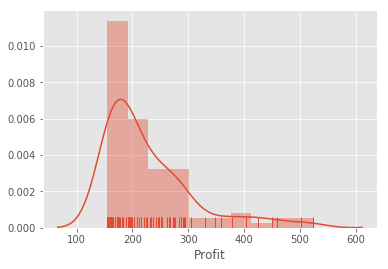

In [0]:
sns.distplot(movies['Profit'][:100], rug=True)
plt.show()

In [0]:
# Write your code to get the top 10 profiting movies here
top10 = pd.DataFrame(movies['movie_title'].iloc[:10])
top10

movie_title
0                                        Avatar 
29                               Jurassic World 
26                                      Titanic 
3024         Star Wars: Episode IV - A New Hope 
3080                 E.T. the Extra-Terrestrial 
17                                 The Avengers 
794                                The Avengers 
509                               The Lion King 
240   Star Wars: Episode I - The Phantom Menace 
66                              The Dark Knight

-  ### Subtask 3.3: Drop duplicate values

After you found out the top 10 profiting movies, you might have notice a duplicate value. So, it seems like the dataframe has duplicate values as well. Drop the duplicate values from the dataframe and repeat `Subtask 3.2`.

In [0]:
# Write your code for dropping duplicate values here
movies.drop_duplicates(['movie_title'],keep='first',inplace=True)

In [0]:
#Grab the relevant data, scale the predictor variable, and add a column of 1s for the gradient descent...
y = movies['gross']
x = movies['budget']

x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x] 

In [0]:
#GRADIENT DESCENT

alpha = 0.01 #Step size
iterations = 2000 #No. of iterations
m = y.size #No. of data points
np.random.seed(123) #Set the seed
theta = np.random.rand(2) #Pick some random values to start with


#GRADIENT DESCENT
def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs

#Pass the relevant variables to the function and get the new values back...
past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

#Print the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: 50.30, 15.32


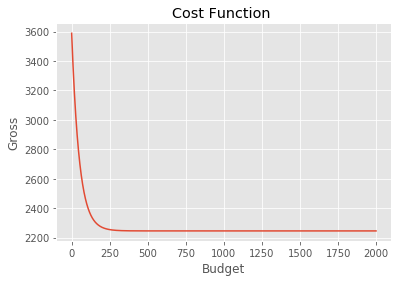

In [0]:
#Plot the cost function...
plt.title('Cost Function ')
plt.ylabel('Gross')
plt.xlabel('Budget')
plt.plot(past_costs)
plt.show()

In [0]:
#Animation

#Set the plot up,
fig = plt.figure()
ax = plt.axes()
plt.title('Budget vs Gross')
plt.ylabel('Gross in million dollars$')
plt.xlabel('Budget in dollars')
plt.scatter(x[:,1], y, color='crimson')
line, = ax.plot([], [], lw=2)
annotation = ax.text(-1, 700000, '')
annotation.set_animated(True)
plt.close()

#Generate the animation data,
def init():
    line.set_data([], [])
    annotation.set_text('')
    return line, annotation

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(-5, 20, 1000)
    y = past_thetas[i][1]*x + past_thetas[i][0]
    line.set_data(x, y)
    annotation.set_text('Cost = %.2f e10' % (past_costs[i]/10000000000))
    return line, annotation

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=300, interval=0, blit=True)

anim.save('animation.gif', writer='pillow', fps = 30)


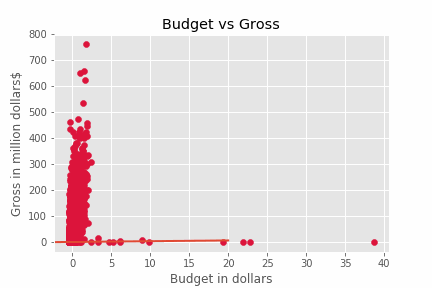

In [0]:
#Display the animation...
import io
import base64
from IPython.display import HTML

filename = 'animation.gif'

video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

In [0]:
# Write code for repeating subtask 2 here
movies['Profit']=movies['gross']-movies['budget']
movies.sort_values(('Profit'),axis=0,ascending=False,inplace= True)
top10 = pd.DataFrame(movies['movie_title'].iloc[:10])
top10

movie_title
0                                        Avatar 
29                               Jurassic World 
26                                      Titanic 
3024         Star Wars: Episode IV - A New Hope 
3080                 E.T. the Extra-Terrestrial 
17                                 The Avengers 
509                               The Lion King 
240   Star Wars: Episode I - The Phantom Menace 
66                              The Dark Knight 
439                            The Hunger Games

**Checkpoint 2:** You might spot two movies directed by `James Cameron` in the list.

 > Ans--> Yes, Avatar & Titanic

-  ### Subtask 3.4: Find IMDb Top 250

    1. Create a new dataframe `IMDb_Top_250` and store the top 250 movies with the highest IMDb Rating (corresponding to the column: `imdb_score`). Also make sure that for all of these movies, the `num_voted_users` is greater than 25,000.
Also add a `Rank` column containing the values 1 to 250 indicating the ranks of the corresponding films.
    2. Extract all the movies in the `IMDb_Top_250` dataframe which are not in the English language and store them in a new dataframe named `Top_Foreign_Lang_Film`.

In [0]:
# Write your code for extracting the top 250 movies as per the IMDb score here. Make sure that you store it in a new dataframe 
# and name that dataframe as 'IMDb_Top_250'


IMDb_Top_250=pd.DataFrame(movies)
IMDb_Top_250.sort_values(by='imdb_score',ascending=False,inplace=True)
IMDb_Top_250=IMDb_Top_250[IMDb_Top_250.num_voted_users>25000]
IMDb_Top_250['Rank'] = range(1,len(IMDb_Top_250)+1)
IMDb_Top_250.set_index('Rank',inplace=True)

IMDb_Top_250.iloc[:250]



director_name  ...  Profit
Rank                                    ...        
1                       Frank Darabont  ...    3.34
2                 Francis Ford Coppola  ...  128.82
3                 Francis Ford Coppola  ...   44.30
4                    Christopher Nolan  ...  348.32
5                         Sergio Leone  ...    4.90
6                     Steven Spielberg  ...   74.07
7                    Quentin Tarantino  ...   99.93
8                        Peter Jackson  ...  283.02
9                        Peter Jackson  ...  220.84
10                      Irvin Kershner  ...  272.16
11                     Robert Zemeckis  ...  274.69
12                   Christopher Nolan  ...  132.57
13                       David Fincher  ...  -25.98
14                      Akira Kurosawa  ...   -1.73
15                       Peter Jackson  ...  246.48
16                  Fernando Meirelles  ...    4.26
17                        Milos Forman  ...  107.60
18                      Lana Wachowski  ...  108.38
19                        George Lucas  ...  449.94
20                     Martin Scorsese  ...   21.84
21                     Charles Chaplin  ...   -1.34
22                           Tony Kaye  ...   -0.79
23                   Christopher Nolan  ...   22.99
24                        Bryan Singer  ...   17.27
25                      Hayao Miyazaki  ...   -8.95
26                    Steven Spielberg  ...  146.12
27                      Jonathan Demme  ...  111.73
28                       David Fincher  ...   67.13
29                       James Cameron  ...  102.84
30    Florian Henckel von Donnersmarck  ...    9.28
...                                ...  ...     ...
221                         Doug Liman  ...  -77.81
222                    Jonathan Dayton  ...   51.89
223                  Quentin Tarantino  ...   10.12
224                     Michael Haneke  ...   -8.67
225                       Dean DeBlois  ...   32.00
226                       Duncan Jones  ...    0.01
227                   Fabián Bielinsky  ...   -0.28
228                         Tim Burton  ...   36.36
229               Christophe Barratier  ...   -1.87
230                  Richard Linklater  ...    5.11
231                   Darren Aronofsky  ...   20.24
232                        Yash Chopra  ...   -4.08
233                        John Landis  ...   27.20
234                     Clint Eastwood  ...   -5.25
235                     Philip Kaufman  ...   -5.50
236                     John Carpenter  ...   46.70
237                       Edward Zwick  ...    8.83
238                        Paul Haggis  ...   48.06
239                        John Carney  ...    9.26
240                     Brian De Palma  ...   51.27
241                    Cristian Mungiu  ...    0.60
242                    Paul Greengrass  ...   52.10
243                          Spike Lee  ...   21.05
244                      James Cameron  ...  523.51
245                       F. Gary Gray  ...  133.03
246                      John Lasseter  ...  155.82
247                      Peter Jackson  ...  123.00
248                       Pierre Morel  ...  120.00
249                      James Mangold  ...   91.52
250                     Andrew Adamson  ...  207.65

[250 rows x 14 columns]

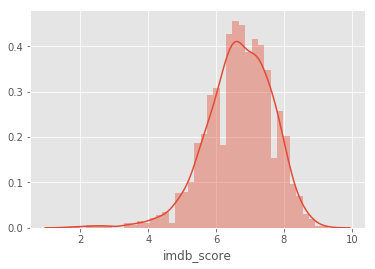

In [0]:
# simple density plot
sns.distplot(IMDb_Top_250['imdb_score'])
plt.show()

In [0]:
Top_Foreign_Lang_Film = IMDb_Top_250[(IMDb_Top_250['language'].values != 'English')]
Top_Foreign_Lang_Film.head(50)

# Write your code to extract top foreign language films from 'IMDb_Top_250' here

director_name  ...   Profit
Rank                                    ...         
5                         Sergio Leone  ...     4.90
14                      Akira Kurosawa  ...    -1.73
16                  Fernando Meirelles  ...     4.26
25                      Hayao Miyazaki  ...    -8.95
30    Florian Henckel von Donnersmarck  ...     9.28
42                        Majid Majidi  ...     0.75
47                  Jean-Pierre Jeunet  ...   -43.80
50                      Hayao Miyazaki  ... -2397.70
53                      Chan-wook Park  ...    -0.82
58                      Asghar Farhadi  ...     6.60
59                      S.S. Rajamouli  ...   -11.53
61                   Wolfgang Petersen  ...    -2.57
70                   Thomas Vinterberg  ...    -3.19
74                 Oliver Hirschbiegel  ...    -8.00
79                          Fritz Lang  ...    -5.97
87                    Denis Villeneuve  ...     0.06
91                  Guillermo del Toro  ...    24.12
92                Juan José Campanella  ...    18.17
102                     Hayao Miyazaki  ...   -19.29
112                 Alejandro Amenábar  ...    -7.91
126                        Je-kyu Kang  ...   -11.69
128                    Katsuhiro Ôtomo  ... -1099.56
132                       José Padilha  ...    -3.99
138                  Thomas Vinterberg  ...     0.35
143              Alejandro G. Iñárritu  ...     3.38
169                         Ari Folman  ...     0.78
174                  Vincent Paronnaud  ...    -2.86
182                        Karan Johar  ...    -7.98
193                       Sergio Leone  ...     3.30
198                      Walter Salles  ...     2.70
218                        Yimou Zhang  ...   -30.92
224                     Michael Haneke  ...    -8.67
227                   Fabián Bielinsky  ...    -0.28
229               Christophe Barratier  ...    -1.87
232                        Yash Chopra  ...    -4.08
234                     Clint Eastwood  ...    -5.25
241                    Cristian Mungiu  ...     0.60
251                            Ang Lee  ...   113.07
259                       Stephen Chow  ...    -2.90
265                         Tom Tykwer  ...     3.77
268                       Ritesh Batra  ...     3.23
269                     Sylvain Chomet  ...    -2.50
270                     Paul Verhoeven  ...   -16.60
303                         Mel Gibson  ...    10.86
311                     Michael Haneke  ...    -9.78
334                    Wolfgang Becker  ...    -0.74
339                    François Girard  ...    -0.53
346                     Hayao Miyazaki  ...   -18.92
349                   Paolo Sorrentino  ...    -6.36
359                     Chan-wook Park  ... -4199.79

[50 rows x 14 columns]

**Checkpoint 3:** Can you spot `Veer-Zaara` in the dataframe?
>Ans --> Yes, at the Rank-index[232]

- ### Subtask 3.5: Find the best directors

    1. Group the dataframe using the `director_name` column.
    2. Find out the top 10 directors for whom the mean of `imdb_score` is the highest and store them in a new dataframe `top10director`. 

In [0]:
# Write your code for extracting the top 10 directors here
top10director= movies.groupby("director_name")[['imdb_score']].mean()
top10director.sort_values(by='imdb_score',ascending=False,inplace=True)

top10director=top10director.iloc[:10]
top10director

imdb_score
director_name                    
Tony Kaye                8.600000
Charles Chaplin          8.600000
Alfred Hitchcock         8.500000
Damien Chazelle          8.500000
Ron Fricke               8.500000
Majid Majidi             8.500000
Sergio Leone             8.433333
Christopher Nolan        8.425000
Richard Marquand         8.400000
Marius A. Markevicius    8.400000

In [0]:
top10director.shape

(10, 1)

**Checkpoint 4:** No surprises that Damien Chazelle (director of Whiplash and La La Land) is in this list.

-  ### Subtask 3.6: Find popular genres

You might have noticed the `genres` column in the dataframe with all the genres of the movies seperated by a pipe (`|`). Out of all the movie genres, the first two are most significant for any film.

1. Extract the first two genres from the `genres` column and store them in two new columns: `genre_1` and `genre_2`. Some of the movies might have only one genre. In such cases, extract the single genre into both the columns, i.e. for such movies the `genre_2` will be the same as `genre_1`.
2. Group the dataframe using `genre_1` as the primary column and `genre_2` as the secondary column.
3. Find out the 5 most popular combo of genres by finding the mean of the gross values using the `gross` column and store them in a new dataframe named `PopGenre`.

In [0]:
# Write your code for extracting the first two genres of each movie here
GENRES1 = []
GENRES2 = []
for i in list(movies['genres'].values) :
	k = i.strip().split('|')
	GENRES1.append(k[0])
	try :
		GENRES2.append(k[1])
	except :
		GENRES2.append(k[0])

A = pd.Series(GENRES1)
B = pd.Series(GENRES2)

# Write your code for extracting the first two genres of each movie here
IMDb_Top_250['genre_1'] = A
IMDb_Top_250['genre_2'] =  B

IMDb_Top_250

director_name  ...    genre_2
Rank                                    ...           
1                       Frank Darabont  ...  Adventure
2                 Francis Ford Coppola  ...    Romance
3                 Francis Ford Coppola  ...  Adventure
4                    Christopher Nolan  ...     Sci-Fi
5                         Sergio Leone  ...  Adventure
6                     Steven Spielberg  ...  Animation
7                    Quentin Tarantino  ...  Adventure
8                        Peter Jackson  ...      Crime
9                        Peter Jackson  ...      Drama
10                      Irvin Kershner  ...  Adventure
11                     Robert Zemeckis  ...     Sci-Fi
12                   Christopher Nolan  ...     Sci-Fi
13                       David Fincher  ...     Comedy
14                      Akira Kurosawa  ...  Biography
15                       Peter Jackson  ...  Animation
16                  Fernando Meirelles  ...  Animation
17                        Milos Forman  ...  Adventure
18                      Lana Wachowski  ...  Adventure
19                        George Lucas  ...      Drama
20                     Martin Scorsese  ...  Adventure
21                     Charles Chaplin  ...     Family
22                           Tony Kaye  ...  Adventure
23                   Christopher Nolan  ...  Adventure
24                        Bryan Singer  ...  Animation
25                      Hayao Miyazaki  ...    Mystery
26                    Steven Spielberg  ...      Drama
27                      Jonathan Demme  ...  Animation
28                       David Fincher  ...     Comedy
29                       James Cameron  ...      Drama
30    Florian Henckel von Donnersmarck  ...  Adventure
...                                ...  ...        ...
2513                  Nelson McCormick  ...    Romance
2514                      Eric Valette  ...      Drama
2515                          Uwe Boll  ...     Sci-Fi
2516                          Bo Welch  ...  Adventure
2517                Steven E. de Souza  ...     Sci-Fi
2518                    Marco Schnabel  ...      Sport
2519                   Joel Schumacher  ...      Crime
2520                  John R. Leonetti  ...  Adventure
2521                       Jan de Bont  ...     Family
2522                   Sidney J. Furie  ...    History
2523                   Jason Friedberg  ...     Comedy
2524                    Malcolm D. Lee  ...      Drama
2525                       Troy Miller  ...    Fantasy
2526                      Dennis Dugan  ...      Drama
2527                             Pitof  ...      Drama
2528                        Bob Spiers  ...    History
2529                       Tamra Davis  ...      Sport
2530                          Uwe Boll  ...   Thriller
2531                    Joseph Sargent  ...      Drama
2532                   Jason Friedberg  ...     Comedy
2533                        James Wong  ...    Romance
2534                     Aaron Seltzer  ...      Crime
2535                      Martin Brest  ...    Romance
2536                   Roger Christian  ...      Crime
2537                          Uwe Boll  ...      Drama
2538                   Jason Friedberg  ...     Family
2539                 Lawrence Guterman  ...      Drama
2540                         Bob Clark  ...      Crime
2541                   Jason Friedberg  ...     Horror
2542                        Jon M. Chu  ...      Music

[2542 rows x 16 columns]

<Figure size 720x576 with 0 Axes>

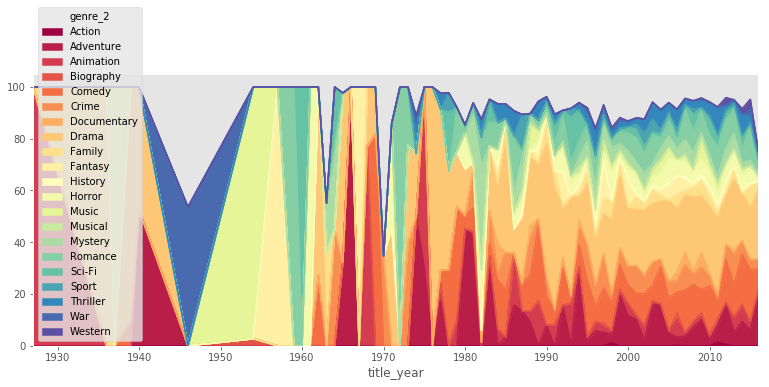

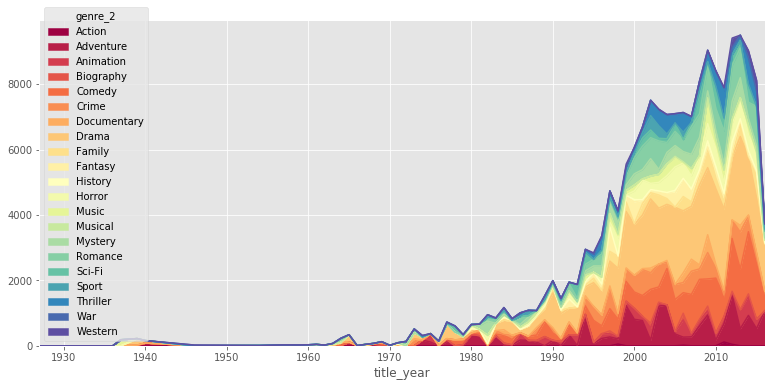

In [0]:
fig = plt.figure(figsize=(10, 8))

genre_sales_percentages_by_year = (IMDb_Top_250.groupby(['title_year', 'genre_2']).gross.sum())*(100)/movies.groupby(['title_year']).gross.sum()
genre_sales_percentages_by_year.unstack().plot(kind='area',stacked=True, colormap= 'Spectral', grid=False, figsize=(13, 5))

yearlySales = IMDb_Top_250.groupby(['title_year','genre_2']).gross.sum()
yearlySales.unstack().plot(kind='area',stacked=True, colormap= 'Spectral', figsize=(13, 6) ) ;

In [0]:
movies_by_segment = IMDb_Top_250[['genre_1','genre_2']]
del movies_by_segment.index.name
movies_by_segment
# Write your code for grouping the dataframe here

genre_1    genre_2
1        Action  Adventure
2         Drama    Romance
3        Action  Adventure
4        Family     Sci-Fi
5        Action  Adventure
6     Adventure  Animation
7        Action  Adventure
8        Action      Crime
9     Adventure      Drama
10       Action  Adventure
11    Adventure     Sci-Fi
12    Adventure     Sci-Fi
13    Animation     Comedy
14       Action  Biography
15    Adventure  Animation
16    Adventure  Animation
17       Action  Adventure
18       Action  Adventure
19       Comedy      Drama
20       Action  Adventure
21       Comedy     Family
22       Action  Adventure
23       Action  Adventure
24       Action  Animation
25        Drama    Mystery
26    Adventure      Drama
27    Adventure  Animation
28    Animation     Comedy
29    Adventure      Drama
30       Action  Adventure
...         ...        ...
2513      Drama    Romance
2514  Biography      Drama
2515      Drama     Sci-Fi
2516     Action  Adventure
2517     Action     Sci-Fi
2518      Drama      Sport
2519     Comedy      Crime
2520     Action  Adventure
2521     Comedy     Family
2522      Drama    History
2523     Action     Comedy
2524     Comedy      Drama
2525     Action    Fantasy
2526     Comedy      Drama
2527     Comedy      Drama
2528      Drama    History
2529     Comedy      Sport
2530      Drama   Thriller
2531  Biography      Drama
2532  Adventure     Comedy
2533     Comedy    Romance
2534     Comedy      Crime
2535      Drama    Romance
2536     Action      Crime
2537     Comedy      Drama
2538  Adventure     Family
2539  Adventure      Drama
2540     Action      Crime
2541     Horror     Horror
2542      Drama      Music

[2542 rows x 2 columns]

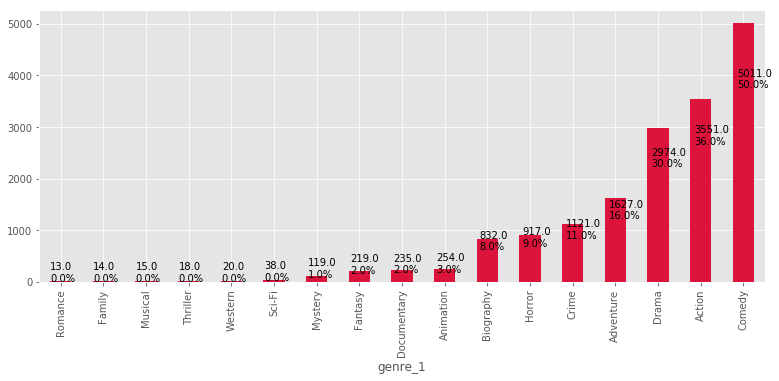

In [0]:
x = IMDb_Top_250.groupby(['genre_1']).sum().copy()
ax = x.imdb_score.sort_values(ascending=True).plot(kind='bar', figsize=(13, 5),color = 'crimson');

for p in ax.patches:
    ax.annotate(str( round( p.get_height() ) ) + "\n" + str(round( p.get_height() /100) )+ "%", 
                (p.get_x() * 1.007, p.get_height() * 0.75),
                color='black')

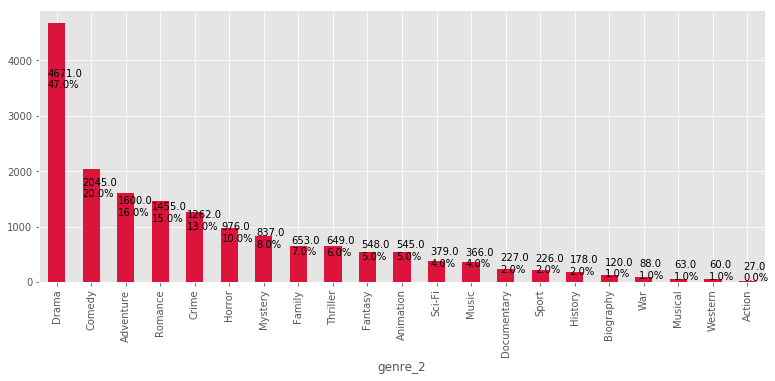

In [0]:
y = IMDb_Top_250.groupby(['genre_2']).sum().copy()
ax = y.imdb_score.sort_values(ascending=False).plot(kind='bar', figsize=(13, 5),color = 'crimson');

for p in ax.patches:
    ax.annotate(str( round( p.get_height() ) ) + "\n" + str(round( p.get_height() /100) )+ "%", 
                (p.get_x() * 1.007, p.get_height() * 0.75),
                color='black')

In [0]:
PopGenre = IMDb_Top_250.groupby(["genre_1",'genre_2'])[['gross']].mean()
PopGenre.sort_values(('gross'),axis = 0,ascending = False,inplace =True)
PopGenre.iloc[:5]
# Write your code for getting the 5 most popular combo of genres here

gross
genre_1   genre_2            
Family    Sci-Fi   533.320000
Mystery   Romance  215.260000
Adventure Sci-Fi   208.298333
Animation Drama    198.836667
Western   Western  190.810000

**Checkpoint 5:** Well, as it turns out. `Family + Sci-Fi` is the most popular combo of genres out there!

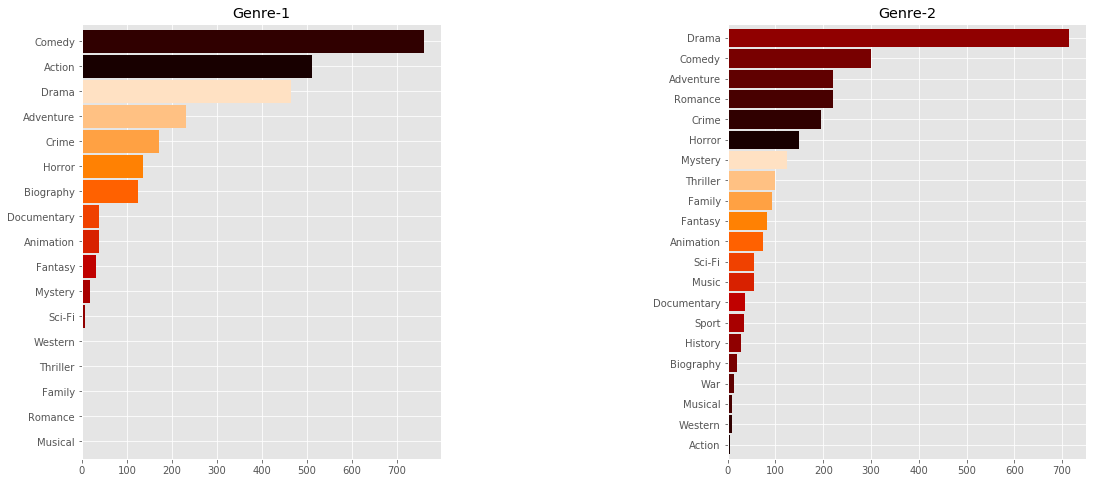

In [0]:
f,ax=plt.subplots(1,2,figsize=(18,8))
IMDb_Top_250['genre_1'].value_counts().sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('gist_heat',15),ax=ax[0])
plt.subplots_adjust(wspace=0.8)
IMDb_Top_250['genre_2'].value_counts().sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('gist_heat',15),ax=ax[1])
plt.subplots_adjust(wspace=0.8)
ax[0].set_title('Genre-1')
ax[1].set_title('Genre-2')
plt.show()

-  ### Subtask 3.7: Find the critic-favorite and audience-favorite actors

    1. Create three new dataframes namely, `Meryl_Streep`, `Leo_Caprio`, and `Brad_Pitt` which contain the movies in which the actors: 'Meryl Streep', 'Leonardo DiCaprio', and 'Brad Pitt' are the lead actors. Use only the `actor_1_name` column for extraction. Also, make sure that you use the names 'Meryl Streep', 'Leonardo DiCaprio', and 'Brad Pitt' for the said extraction.
    2. Append the rows of all these dataframes and store them in a new dataframe named `Combined`.
    3. Group the combined dataframe using the `actor_1_name` column.
    4. Find the mean of the `num_critic_for_reviews` and `num_user_for_review` and identify the actors which have the highest mean.

In [0]:
# Write your code for creating three new dataframes here

Meryl_Streep = movies.loc[movies['actor_1_name'] == 'Meryl Streep']

# Include all movies in which Meryl_Streep is the lead

In [0]:
Leo_Caprio = movies.loc[movies['actor_1_name'] == 'Leonardo DiCaprio']

# Include all movies in which Leo_Caprio is the lead

In [0]:
Brad_Pitt = movies.loc[movies['actor_1_name'] == 'Brad Pitt']

# Include all movies in which Brad_Pitt is the lead

In [0]:
# Write your code for combining the three dataframes here
Combined = Brad_Pitt.append([Leo_Caprio, Meryl_Streep])
Combined

director_name  ...  Profit
400       Steven Soderbergh  ...   98.41
255              Doug Liman  ...   66.34
940             Neil Jordan  ...   45.26
470              David Ayer  ...   17.71
254       Steven Soderbergh  ...   15.53
2204  Alejandro G. Iñárritu  ...    9.30
2682         Andrew Dominik  ...   -0.06
2898             Tony Scott  ...   -0.72
2333    Angelina Jolie Pitt  ...   -9.47
1490        Terrence Malick  ...  -18.70
101           David Fincher  ...  -22.51
683           David Fincher  ...  -25.98
1722         Andrew Dominik  ...  -26.10
611     Jean-Jacques Annaud  ...  -32.10
792         Patrick Gilmore  ...  -33.71
147       Wolfgang Petersen  ...  -41.77
382              Tony Scott  ...  -91.97
26            James Cameron  ...  458.67
97        Christopher Nolan  ...  132.57
911        Steven Spielberg  ...  112.44
296       Quentin Tarantino  ...   62.80
179   Alejandro G. Iñárritu  ...   48.64
452         Martin Scorsese  ...   47.97
361         Martin Scorsese  ...   42.37
50             Baz Luhrmann  ...   39.81
2757           Baz Luhrmann  ...   31.84
1422        Randall Wallace  ...   21.88
308         Martin Scorsese  ...   16.87
1453         Clint Eastwood  ...    2.30
257         Martin Scorsese  ...   -7.39
990             Danny Boyle  ...  -10.22
2067             Jerry Zaks  ...  -10.22
1114             Sam Mendes  ...  -12.12
1560              Sam Raimi  ...  -13.36
326         Martin Scorsese  ...  -22.32
641            Ridley Scott  ...  -30.62
307            Edward Zwick  ...  -42.63
1408          David Frankel  ...   89.73
1575         Sydney Pollack  ...   56.10
1204            Nora Ephron  ...   54.13
1618          David Frankel  ...   33.54
410            Nancy Meyers  ...   27.70
2781         Phyllida Lloyd  ...   16.96
1925         Stephen Daldry  ...   16.60
3135          Robert Altman  ...   10.34
1106          Curtis Hanson  ...    1.82
1674          Carl Franklin  ...   -6.79
1483         Robert Redford  ...  -20.00

[48 rows x 14 columns]

In [0]:
# Write your code for grouping the combined dataframe & finding the mean of critic reviews and audience reviews here
superstar= Combined.groupby('actor_1_name')[['num_critic_for_reviews','num_user_for_reviews']].mean()
superstar.sort_values(('num_critic_for_reviews'),axis = 0,ascending = False,inplace =True)

In [0]:
superstar


num_critic_for_reviews  num_user_for_reviews
actor_1_name                                                   
Leonardo DiCaprio              322.200000            922.550000
Brad Pitt                      245.000000            742.352941
Meryl Streep                   181.454545            297.181818

**Checkpoint 6:** `Leonardo` has aced both the lists!

In [0]:
# the commonly used alias for seaborn is sns
import seaborn as sns
%matplotlib inline

# set a seaborn style of your taste
#sns.set_style("whitegrid")

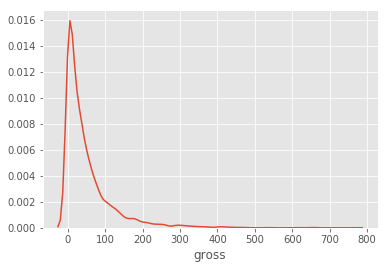

In [0]:
sns.distplot(movies['gross'], hist=False)
plt.show()

In [0]:
# sns.boxplot(movies['movie_title'])
# plt.title('Profitss')

# plt.show()

In [0]:
curr = IMDb_Top_250[["movie_facebook_likes", "imdb_score", 'num_user_for_reviews', "Profit"]]
curr.head()

movie_facebook_likes  imdb_score  num_user_for_reviews  Profit
1                108000         9.3                4144.0    3.34
2                 43000         9.2                2238.0  128.82
3                 14000         9.0                 650.0   44.30
4                 37000         9.0                4667.0  348.32
5                 20000         8.9                 780.0    4.90

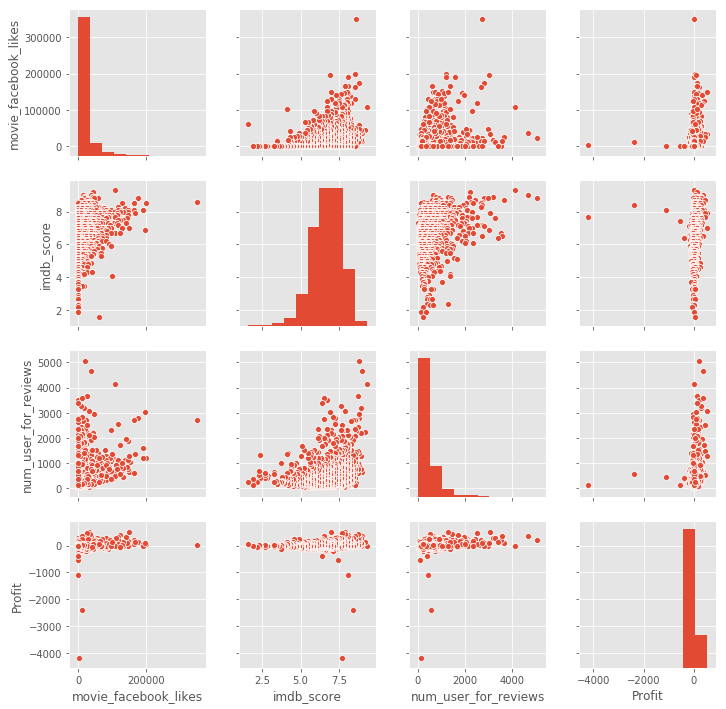

In [0]:
# pairplot
sns.pairplot(curr)
plt.show()

In [0]:
# You can also observe the correlation between the currencies 
# using df.corr()
cor = curr.corr()
round(cor, 3)

movie_facebook_likes  ...  Profit
movie_facebook_likes                 1.000  ...   0.103
imdb_score                           0.277  ...   0.094
num_user_for_reviews                 0.317  ...   0.187
Profit                               0.103  ...   1.000

[4 rows x 4 columns]